In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data=files.upload()

Saving iot-1.csv to iot-1.csv


In [ ]:
df = pd.read_csv('iot-1.csv')

In [ ]:
column_names = ['heart', 'a1', 'a2','a3','g1','g2','g3']
df.columns = column_names

In [ ]:
def calculate_deviations(df):
    column_names = df.columns.tolist()

    for column in column_names:
        average = df[column].mean()
        deviation_column = column + '_deviation'
        df[deviation_column] = df[column] - average

    return df

In [ ]:
calculate_deviations(df)

,heart,a1,a2,a3,g1,g2,g3,heart_deviation,a1_deviation,a2_deviation,a3_deviation,g1_deviation,g2_deviation,g3_deviation
0,1004,0.04,0.11,0.810,-17,-14,19,117.795812,0.038796,0.113665,-0.196602,-15.240838,-12.104712,19.041885
1,1004,0.18,0.18,1.134,0,-8,14,117.795812,0.178796,0.183665,0.127398,1.759162,-6.104712,14.041885
2,1003,-0.02,-0.06,1.025,-7,3,4,116.795812,-0.021204,-0.056335,0.018398,-5.240838,4.895288,4.041885
3,1003,0.14,-0.13,0.840,-21,15,21,116.795812,0.138796,-0.126335,-0.166602,-19.240838,16.895288,21.041885
4,1003,-0.05,-0.17,0.848,-10,-14,-23,116.795812,-0.051204,-0.166335,-0.158602,-8.240838,-12.104712,-22.958115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,628,-0.03,-0.16,0.857,-20,-18,18,-258.204188,-0.031204,-0.156335,-0.149602,-18.240838,-16.104712,18.041885
187,638,-0.02,-0.01,0.943,22,6,-10,-248.204188,-0.021204,-0.006335,-0.063602,23.759162,7.895288,-9.958115
188,681,-0.03,-0.15,0.917,-13,-1,9,-205.204188,-0.031204,-0.146335,-0.089602,-11.240838,0.895288,9.041885
189,699,-0.01,-0.01,1.016,15,-24,21,-187.204188,-0.011204,-0.006335,0.009398,16.759162,-22.104712,21.041885


In [ ]:
print(min(df['a2_deviation']))

-0.19633507853403143


In [ ]:
def rewrite_values(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: 1 if 50 <= x % 1000 <= 200 else (2 if 200 < x % 1000 <= 700 else 3))
    return df

In [ ]:
col="heart_deviation"
rewrite_values(df,col)

,heart,a1,a2,a3,g1,g2,g3,heart_deviation,a1_deviation,a2_deviation,a3_deviation,g1_deviation,g2_deviation,g3_deviation
0,1004,0.04,0.11,0.810,-17,-14,19,1,0.038796,0.113665,-0.196602,-15.240838,-12.104712,19.041885
1,1004,0.18,0.18,1.134,0,-8,14,1,0.178796,0.183665,0.127398,1.759162,-6.104712,14.041885
2,1003,-0.02,-0.06,1.025,-7,3,4,1,-0.021204,-0.056335,0.018398,-5.240838,4.895288,4.041885
3,1003,0.14,-0.13,0.840,-21,15,21,1,0.138796,-0.126335,-0.166602,-19.240838,16.895288,21.041885
4,1003,-0.05,-0.17,0.848,-10,-14,-23,1,-0.051204,-0.166335,-0.158602,-8.240838,-12.104712,-22.958115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,628,-0.03,-0.16,0.857,-20,-18,18,3,-0.031204,-0.156335,-0.149602,-18.240838,-16.104712,18.041885
187,638,-0.02,-0.01,0.943,22,6,-10,3,-0.021204,-0.006335,-0.063602,23.759162,7.895288,-9.958115
188,681,-0.03,-0.15,0.917,-13,-1,9,3,-0.031204,-0.146335,-0.089602,-11.240838,0.895288,9.041885
189,699,-0.01,-0.01,1.016,15,-24,21,3,-0.011204,-0.006335,0.009398,16.759162,-22.104712,21.041885


In [ ]:
def rewrite_values2(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: 2 if  -0.2<= x<= -0.15 else (1 if -0.15 < x  <= 0.15 else 3))
    return df

In [ ]:
col="a3_deviation"
rewrite_values2(df,col)

,heart,a1,a2,a3,g1,g2,g3,heart_deviation,a1_deviation,a2_deviation,a3_deviation,g1_deviation,g2_deviation,g3_deviation
0,1004,0.04,0.11,0.810,-17,-14,19,1,0.038796,0.113665,2,-15.240838,-12.104712,19.041885
1,1004,0.18,0.18,1.134,0,-8,14,1,0.178796,0.183665,1,1.759162,-6.104712,14.041885
2,1003,-0.02,-0.06,1.025,-7,3,4,1,-0.021204,-0.056335,1,-5.240838,4.895288,4.041885
3,1003,0.14,-0.13,0.840,-21,15,21,1,0.138796,-0.126335,2,-19.240838,16.895288,21.041885
4,1003,-0.05,-0.17,0.848,-10,-14,-23,1,-0.051204,-0.166335,2,-8.240838,-12.104712,-22.958115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,628,-0.03,-0.16,0.857,-20,-18,18,3,-0.031204,-0.156335,1,-18.240838,-16.104712,18.041885
187,638,-0.02,-0.01,0.943,22,6,-10,3,-0.021204,-0.006335,1,23.759162,7.895288,-9.958115
188,681,-0.03,-0.15,0.917,-13,-1,9,3,-0.031204,-0.146335,1,-11.240838,0.895288,9.041885
189,699,-0.01,-0.01,1.016,15,-24,21,3,-0.011204,-0.006335,1,16.759162,-22.104712,21.041885


In [ ]:
col="a2_deviation"
rewrite_values2(df,col)

,heart,a1,a2,a3,g1,g2,g3,heart_deviation,a1_deviation,a2_deviation,a3_deviation,g1_deviation,g2_deviation,g3_deviation
0,1004,0.04,0.11,0.810,-17,-14,19,1,0.038796,1,2,-15.240838,-12.104712,19.041885
1,1004,0.18,0.18,1.134,0,-8,14,1,0.178796,3,1,1.759162,-6.104712,14.041885
2,1003,-0.02,-0.06,1.025,-7,3,4,1,-0.021204,1,1,-5.240838,4.895288,4.041885
3,1003,0.14,-0.13,0.840,-21,15,21,1,0.138796,1,2,-19.240838,16.895288,21.041885
4,1003,-0.05,-0.17,0.848,-10,-14,-23,1,-0.051204,2,2,-8.240838,-12.104712,-22.958115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,628,-0.03,-0.16,0.857,-20,-18,18,3,-0.031204,2,1,-18.240838,-16.104712,18.041885
187,638,-0.02,-0.01,0.943,22,6,-10,3,-0.021204,1,1,23.759162,7.895288,-9.958115
188,681,-0.03,-0.15,0.917,-13,-1,9,3,-0.031204,1,1,-11.240838,0.895288,9.041885
189,699,-0.01,-0.01,1.016,15,-24,21,3,-0.011204,1,1,16.759162,-22.104712,21.041885


In [ ]:
col="a1_deviation"
rewrite_values2(df,col)

,heart,a1,a2,a3,g1,g2,g3,heart_deviation,a1_deviation,a2_deviation,a3_deviation,g1_deviation,g2_deviation,g3_deviation
0,1004,0.04,0.11,0.810,-17,-14,19,1,1,1,2,-15.240838,-12.104712,19.041885
1,1004,0.18,0.18,1.134,0,-8,14,1,3,3,1,1.759162,-6.104712,14.041885
2,1003,-0.02,-0.06,1.025,-7,3,4,1,1,1,1,-5.240838,4.895288,4.041885
3,1003,0.14,-0.13,0.840,-21,15,21,1,1,1,2,-19.240838,16.895288,21.041885
4,1003,-0.05,-0.17,0.848,-10,-14,-23,1,1,2,2,-8.240838,-12.104712,-22.958115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,628,-0.03,-0.16,0.857,-20,-18,18,3,1,2,1,-18.240838,-16.104712,18.041885
187,638,-0.02,-0.01,0.943,22,6,-10,3,1,1,1,23.759162,7.895288,-9.958115
188,681,-0.03,-0.15,0.917,-13,-1,9,3,1,1,1,-11.240838,0.895288,9.041885
189,699,-0.01,-0.01,1.016,15,-24,21,3,1,1,1,16.759162,-22.104712,21.041885


In [ ]:
print(max(df['g1_deviation']))

25.759162303664922


In [ ]:
def values4(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: 2 if -25 <= x % 1000 <= -10 else (1 if -10 < x % 1000 <= 10 else 3))
    return df

In [ ]:
col="g1_deviation"
values4(df,col)
col="g2_deviation"
values4(df,col)
col="g3_deviation"
values4(df,col)

,heart,a1,a2,a3,g1,g2,g3,heart_deviation,a1_deviation,a2_deviation,a3_deviation,g1_deviation,g2_deviation,g3_deviation
0,1004,0.04,0.11,0.810,-17,-14,19,1,1,1,2,3,3,3
1,1004,0.18,0.18,1.134,0,-8,14,1,3,3,1,1,3,3
2,1003,-0.02,-0.06,1.025,-7,3,4,1,1,1,1,3,1,1
3,1003,0.14,-0.13,0.840,-21,15,21,1,1,1,2,3,3,3
4,1003,-0.05,-0.17,0.848,-10,-14,-23,1,1,2,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,628,-0.03,-0.16,0.857,-20,-18,18,3,1,2,1,3,3,3
187,638,-0.02,-0.01,0.943,22,6,-10,3,1,1,1,3,1,3
188,681,-0.03,-0.15,0.917,-13,-1,9,3,1,1,1,3,1,1
189,699,-0.01,-0.01,1.016,15,-24,21,3,1,1,1,3,3,3


In [ ]:
columns_to_sum = ['heart_deviation',	'g1_deviation',	'g2_deviation',	'a1_deviation',	'a2_deviation',	'a3_deviation']
def calculate_row_sum(row):
    return row['heart_deviation'] + row['g1_deviation'] + row['g2_deviation']+ row['g3_deviation']+ row['a1_deviation']+ row['a2_deviation']+ row['a3_deviation']

# Create a new column using the apply() function
df['sum'] = df.apply(calculate_row_sum, axis=1)

In [ ]:
print(max(df['sum']))

19.0


In [ ]:
def values5(df, column_name,final):
    df['final'] = df[column_name].apply(lambda x: 1 if x % 1000 <= 11 else (2 if 11 < x % 1000 <= 14 else 3))
    return df


In [ ]:
col=['final']
values5(df,'sum',col)

,heart,a1,a2,a3,g1,g2,g3,heart_deviation,a1_deviation,a2_deviation,a3_deviation,g1_deviation,g2_deviation,g3_deviation,sum,final
0,1004,0.04,0.11,0.810,-17,-14,19,1,1,1,2,3,3,3,14.0,2
1,1004,0.18,0.18,1.134,0,-8,14,1,3,3,1,1,3,3,15.0,3
2,1003,-0.02,-0.06,1.025,-7,3,4,1,1,1,1,3,1,1,9.0,1
3,1003,0.14,-0.13,0.840,-21,15,21,1,1,1,2,3,3,3,14.0,2
4,1003,-0.05,-0.17,0.848,-10,-14,-23,1,1,2,2,3,3,3,15.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,628,-0.03,-0.16,0.857,-20,-18,18,3,1,2,1,3,3,3,16.0,3
187,638,-0.02,-0.01,0.943,22,6,-10,3,1,1,1,3,1,3,13.0,2
188,681,-0.03,-0.15,0.917,-13,-1,9,3,1,1,1,3,1,1,11.0,1
189,699,-0.01,-0.01,1.016,15,-24,21,3,1,1,1,3,3,3,15.0,3


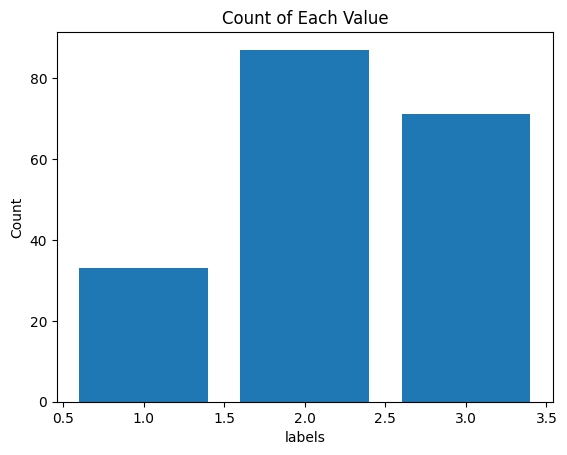

In [ ]:
import matplotlib.pyplot as plt
series = pd.Series(df['final'])
value_counts = series.value_counts()
plt.bar(value_counts.index, value_counts.values)
labels = ['low (deep sleep)', 'mid (medium sleep)', 'awake']
plt.xlabel('labels')
plt.ylabel('Count')
plt.title('Count of Each Value')
plt.show()








In [ ]:
x=df[['heart','a1','a2','a3','g1','g2','g3']]
x

,heart,a1,a2,a3,g1,g2,g3
0,1004,0.04,0.11,0.810,-17,-14,19
1,1004,0.18,0.18,1.134,0,-8,14
2,1003,-0.02,-0.06,1.025,-7,3,4
3,1003,0.14,-0.13,0.840,-21,15,21
4,1003,-0.05,-0.17,0.848,-10,-14,-23
...,...,...,...,...,...,...,...
186,628,-0.03,-0.16,0.857,-20,-18,18
187,638,-0.02,-0.01,0.943,22,6,-10
188,681,-0.03,-0.15,0.917,-13,-1,9
189,699,-0.01,-0.01,1.016,15,-24,21


In [ ]:
y=df[['final']]
y

,final
0,2
1,3
2,1
3,2
4,3
...,...
186,3
187,2
188,1
189,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
y_test

,final
109,1
74,2
162,2
96,2
124,2
71,3
18,2
125,2
144,3
7,1


2    21
3    13
1     5
Name: final, dtype: int64


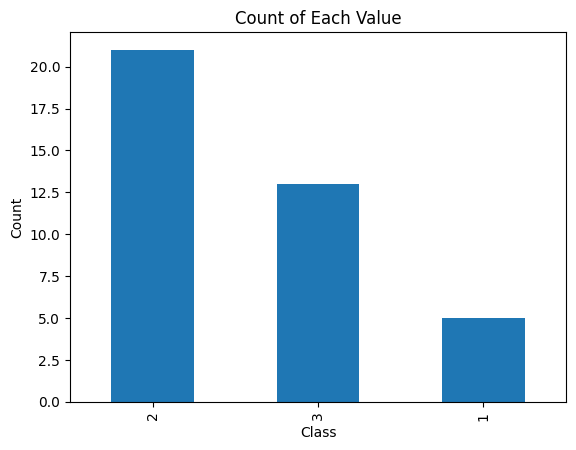

In [ ]:
import pandas as pd
import numpy as np
series = pd.Series(y_test['final'])
value_counts = series.value_counts()
print(value_counts)
value_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Value')
plt.show()


In [ ]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy
best_model = None
best_accuracy = 0
for n_estimators in [50, 100, 200]:
    for max_depth in [None, 5, 10]:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train['final'])
        y_pred = model.predict(X_test)
        accuracy = evaluate_model(y_test['final'], y_pred)
        print(f"n_estimators={n_estimators}, max_depth={max_depth}")
        print(f"Accuracy: {accuracy:.4f}")
        if accuracy > best_accuracy:
            best_model = model
            best_accuracy = accuracy
print("Best Model:")
print(best_model)

n_estimators=50, max_depth=None
Accuracy: 0.5385
n_estimators=50, max_depth=5
Accuracy: 0.5897
n_estimators=50, max_depth=10
Accuracy: 0.5641
n_estimators=100, max_depth=None
Accuracy: 0.6410
n_estimators=100, max_depth=5
Accuracy: 0.5897
n_estimators=100, max_depth=10
Accuracy: 0.6410
n_estimators=200, max_depth=None
Accuracy: 0.6154
n_estimators=200, max_depth=5
Accuracy: 0.6154
n_estimators=200, max_depth=10
Accuracy: 0.6154
Best Model:
RandomForestClassifier(random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

model.fit(X_train, y_train['final'])
y_pred1 = model.predict(X_test)
accuracy = evaluate_model(y_test['final'], y_pred1)
accuracy

0.6410256410256411

2    23
3    13
1     3
dtype: int64


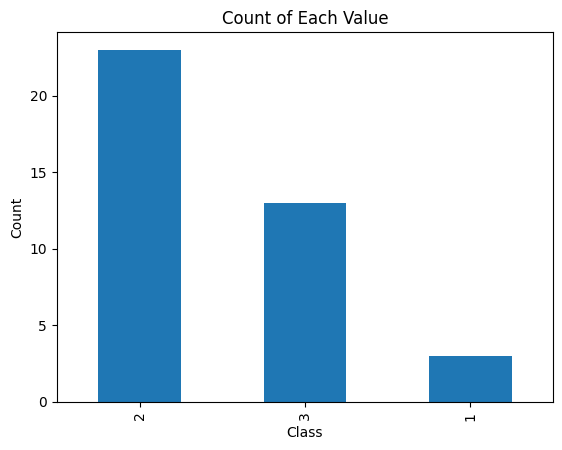

In [ ]:
import pandas as pd
import numpy as np
series = pd.Series(y_pred1)
value_counts = series.value_counts()
print(value_counts)
value_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Value')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
y = np.ravel(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the logistic regression model
model2 = LogisticRegression(max_iter=2000)
model2.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred = model2.predict(X_test)
accuracy = evaluate_model(y_test, y_pred)
accuracy

0.46153846153846156

for testing data:


In [ ]:
data=files.upload()

Saving teraterm.csv to teraterm.csv


In [ ]:
test_data=pd.read_csv('teraterm.csv')

In [ ]:
column_names = ['heart', 'a1', 'a2','a3','g1','g2','g3']
test_data.columns = column_names

In [ ]:
y_predfinal = model.predict(test_data)


In [ ]:
y_predfinal

array([2, 2, 2, 1, 2, 3, 3, 2, 2, 2, 2, 3, 1, 2, 3, 1, 2, 1, 2])

2    11
1     4
3     4
dtype: int64


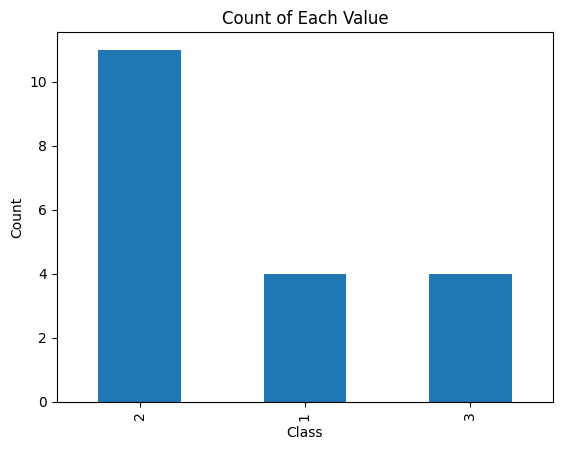

2


In [ ]:
import pandas as pd
import numpy as np
series = pd.Series(y_predfinal)
value_counts1 = series.value_counts()
print(value_counts1)
value_counts1.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Value')
plt.show()
print(value_counts.idxmax())

In [ ]:
from IPython.display import display, HTML
if value_counts.idxmax()==3:
  html_url = "https://health1.my.canva.site/"
elif value_counts.idxmax()==2:
  html_url = "https://health1.my.canva.site/find-a-more-balanced-approach-to-improve-your-sleep"
else:
  html_url = "https://health1.my.canva.site/you-seem-to-have-a-almost-perfect-sleep-keep-going-keep-sleeping-well"

html_link = f'<a href="{html_url}" target="_blank">Go to HTML Site</a>'

# Display the link in Colab
display(HTML(html_link))